# 3) $\chi^2$-test (chi i anden)
Formål: Du vil blive introduceret til $\chi^2$-testen som er et statistisk værktøj der anvendes til at vurderer om ens resultater stemmer overens med den teoretiske fordeling.

<i> Chi kommer af det græske symbol $\chi$. I fysik og matematik løber vi desværre hurtigt tør for bogstaver og må derfor låne fra det græske. </i>

Chi i anden testen er et statistisk værktøj man bruger til at sammenligne data man har observeret med den data vi forventer (typisk en teoretisk værdi). 

- Du vil blive introduceret til [$\chi^2$-testen](https://www.webmatematik.dk/lektioner/matematik-b/statistik/chi-i-anden-test ) i matematik på b-niveau i gymnasiet 
___
## Teoriafsnit
Dette afnsit forklarer dig trinvis hvordan $\chi^2$-testen udføres. 

#### 1) Opstiller en nulhypotese:
Inden man udfører $\chi^2$-testen opstilles en nulhypotese. Det er en påstand (et postulat) der skal stille spørgsmålet om hvorvidt din undersøgelse (observationer) matcher den bagvedliggende teori (forventede).

##### 1.2) sætter et signifikansniveau:
Hvor mange procent er grænsen for at vores test holder? Det vurderer man på forhånd. Denne grænse kaldes for signifikansniveauet. Den er typisk bestemt på forhånd til 0.05(5%), men kan i visse tilfælde være tilpasset den bestemte undersøgelse. 

<i>I denne notebook sættes signifikantsniveauet til 0.05, altså 5%. </i>

#### 2) Indsætter data:
Når det kommer til at kodning, er det en fordel at arbejde med lister når man har med større data at gøre. 

I vores eksempel med skostørrelser nedenunder har vi opsat dataen i lister der gør det overskueligt for dig selv og python.  


#### 3) Udfører $\chi^2$-testen: 
Chi i anden testen anvendes blandt andet til at:
- Undersøge om indsamlet data (observerede) matcher med teoretiske værdier som kendes på forhånd (forventede).

- teste om to variable er uafhængige af hinanden.

<b> Formlen ser sådan ud:</b>

$
\chi^2 = \sum \frac{(Observerede_i - Forventede_i)^2}{Forventede_i}
$
- <u>Observerede værdier</u>: antal elever med given skostørrelse
- <u>Forventede værdier</u>: Antal elever vi forventer der har den givende skostørrelse (Vi leger at vi kender fordelingen)

(Mere om $\sum$ [summationstegn](https://www.webmatematik.dk/lektioner/matematik-b/statistik/summationstegn) )



#### 4) Udregner p-værdien
P-værdien udregnes ud fra $\chi^2$-testen og er en værdi der gør det muligt at sige noget konkret om vores nulhypotese. 

P-værdien bruges til at afgøre, om nulhypotesen kan afvises. Hvis den er mindre end eller lig med signifikansniveauet (typisk 0,05), afviser vi nulhypotesen. Hvis p-værdien er større, kan nulhypotesen ikke afvises.

#### 5) Fortolker resultaterne af testen
Du kan tolke dine resultater på to måder. Hhv. ved at slå den kritiske værdi op for din $\chi^2$-test eller direkte aflæsning af p-værdien. For at gøre begge skal du dog kende til antallet af frihedsgrader.


<b> Frihedsgrader:</b>  For at tolke $\chi^2$-testen og udregne p-værdien skal man også kende antallet af frihedsgrader. Det fås ved: 

$Frihedsgrader = (typer\space observationer) - 1$. 


Vi kommer ikke dybere ind på frihedsgraderne, men på [Webmatematik](https://www.webmatematik.dk/lektioner/matematik-b/statistik/chi-i-anden-test) står der en mere detaljeret forklaring om frihedsgrader. 

#### Fortolke resultater via $\chi^2$-testen
$\chi^2$-testen kan aflæses ved at bruge et [$\chi^2$ skema](https://www.webmatematik.dk/Oldsite/media/34490517/2-65.png). Skemaet opstiller lister af kritiske værdier. De er bestemt ud fra antal frihedsgrader og størrelsen på signifikans. 

Hvis størrelsen på din $\chi^2$-test overskrider den kritiske værdi forkastes nulhypotesen. Dette vil med andre ord betyde, at der ikke er nogen signifikans sammenhæng mellem din observerede data og den teoretiske fordeling hvis størrelsen på din $\chi^2$-test er større end den kritiske værdi.  

#### Fortolke resultater via p-værdien
For at fortolke resultater ud fra p-værdien, aflæses den direkte. Modsat $\chi^2$-testen, skal denne værdi være <u>større</u> end signifikansen. På denne måde kan vi mere effektivt kommentere på vores resultater, uden først at skulle aflæse et skema. 
___ 

Det forventes ikke at du forstår denne notebook til fuld, derfor har vi ordnet koden for dig. Målet er, at du aflæser resultatet, og prøver at forstå hvilken betydning det har for den statistiske analyse. 
___
___
## Tilbage til vores eksempel med skostørrelser
Vi vil nu gennemgå de forskellige trin i vores eksempel med skostørrelser:

In [26]:
# Vi indlæser først pakkerne 
import numpy as np
from scipy.stats import chisquare #fra pakken scipy.stats der kommer med en masse brugbare statistiske værktøjer!
import matplotlib.pyplot as plt

### 1) Opstiller vores nulhypotese:

<i>"Ved at indsamle data af skostørrelser forventer vi at den følger fordelingen af skostørrelser der er baseret på en teoretisk model."</i>

(Vi sætter signifikansniveauet til 5% og undersøger om den grænse overskrides når vi skelner forskellen på den observerede data og den teoretiske)

### 2) Indsætter data:
<b> Til kodningen</b>: skal vi bruge 3 lister (en række af værdier).
1) <b>Størrelser:</b> repræsenter intervallet af de forskellige skostørrelser der måles. I dette tilfælde er der indsamlet data af skostørrelser i intervallet str. 36-40. 
2) <b>Observerede:</b> repræsenterer data man observerer. I dette tilfælde er der talt skostørrelser for 100 personer i intervallet 36-40. 


3) <b>Forventede:</b> repræsenter den teoretiske værdi. I dette tilfælde baseret på skostørrer i Storbritanien for 100 personer i intervallet 36-40.

In [27]:
#Skostørrelser
størrelser = ['36', '37', '38', '39', '40'] 

# Observerede skostørrelser: Data vi selv har indsamlet
observerede = [4, 12, 30, 38, 16] # Skostørrelser: 36, 37, 38, 39, 40

#Forventede skostørrelse: Tabelværdi 
forventede = [2.28, 13.59, 34.13, 34.13, 13.59]  # Forventet indtastet på forhånd


### 3) Visualiserer listerne: 
(ikke et krav, men kan hjælpe til at danne et bedre overblik over det vi prøver at sammenligne)

<b> Plot data: </b> Lad os visualliserer vores observerede og teoretiske fordelinger af skostørrelser med et plot.

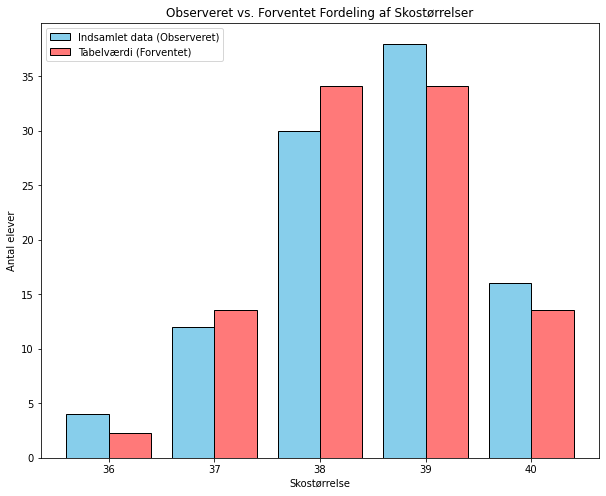

In [28]:
# Visualisering
plt.figure(figsize=(10,8))
x = np.arange(len(størrelser))
plt.bar(x - 0.2, observerede, width=0.4, label='Indsamlet data (Observeret)', color='skyblue', edgecolor = 'black')
plt.bar(x + 0.2, forventede, width=0.4, label='Tabelværdi (Forventet)', color='#ff7979', edgecolor = 'black')
plt.xticks(x, størrelser)
plt.xlabel('Skostørrelse')
plt.ylabel('Antal elever')
plt.title('Observeret vs. Forventet Fordeling af Skostørrelser')
plt.legend()
plt.show()

### 4) Udfører <b> $\chi^2$-testen:</b> 
den findes som en kommando hvor man bare skal indsætte dataen vi skrev i starten.

In [29]:
# Beregner chi i anden og p-værdi (forklares i slutningen af notebook)
chi2, p_værdi = chisquare(f_obs = observerede, f_exp = forventede)

# Viser resultaterne 
print(f'Chi²-test: {chi2:.2f}')
print(f'P-værdi: {p_værdi:.4f}')

Chi²-test: 2.85
P-værdi: 0.5833


### 5) Fortolker vores resultater:
    
Vi kan nu besvare den nulhypotese vi startede notebooken med. 

<u>P-værdien er større end 0.05: </u>
- <i>Nulhypotesen siger at de observerede skostørrelser ikke afviger betydeligt fra de forventede skostørrelser. </i>

Med andre ord viser vores undersøgelse ikke nogen stor forskel mellem den indsamlede data og forventede fordeling af skostørrelserne. Derfor viser det sig at vores test passer til det vi ville forvente. 

<u> Hvad hvis p-værdien var mindre end 0.05?</u>

I dette tilfælde ville vi afvise nulhypotesen og konkludere, at fordelingen af skostørrelser ikke passer til den forventede fordeling.

<b> Bonus:</b> Kan du fortolke dine resultater ud fra [$\chi^2$ skemaet?](https://www.webmatematik.dk/Oldsite/media/34490517/2-65.png) 
- Hint: Typer skostørrelser: 36, 37, 38, 39, 40
    - <i>Frihedsgrader = antal af typer skostørrelser - 1</i>
___

Du er nu færdig med $\chi^2$ afsnittet. Hvis du føler at du har dannet dig en god forståelse for emnet kan du prøve at ændre i listen <b>observerede</b> (bare husk at summen skal være 100). Se hvordan det påvirker størrelsen af $\chi^2$-testen og p-værdien. 
___

Tilføj egne noter <b> her</b>: